In [14]:
import kagglehub

path = kagglehub.dataset_download("rashikrahmanpritom/plant-disease-recognition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd

l=[]
import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1'):
    for filename in filenames:
        i_paths=os.path.join(dirname, filename)
        l.append(i_paths)
        print(i_paths)

/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9b6a318cc5721d73.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9b3064cb6d5bd252.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9c1e3a3aa68c7971.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9cb395dc678b6580.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9bae271592e9e4c2.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/Powdery/9b60296e617c497b.jpg
/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Validation/Validation/

In [20]:
%cd /root/.cache/kagglehub/datasets/rashikrahmanpritom/

/root/.cache/kagglehub/datasets/rashikrahmanpritom


### 1- Importing Libraries

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model
import seaborn as sns
import cv2
import numpy as np
import os

### 2- Loading Plant Disease Recognition Dataset (train, validation, test)

In [42]:
import cv2
import numpy as np
import os

def apply_gaussian_blur(image, kernel_size=(5, 5)):

    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):

    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l_channel = clahe.apply(l_channel)

    lab_image = cv2.merge((l_channel, a_channel, b_channel))
    return cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

def convert_to_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def preprocess_image(image):
    image = apply_gaussian_blur(image)
    image = apply_clahe(image)

    return image

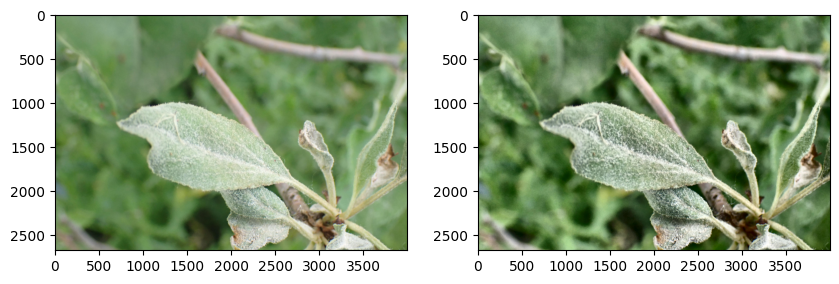

In [43]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blurred_image = apply_gaussian_blur(image)
    enhanced_image = apply_clahe(blurred_image)

    return enhanced_image
image=l[0]
image=preprocess_image(image)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(l[0]), cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [44]:
import tensorflow as tf

batch_size = 32
img_height = 256
img_width = 256


train_data = tf.keras.utils.image_dataset_from_directory(
    'plant-disease-recognition-dataset/versions/1/Train/Train',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123
)
val_data = tf.keras.utils.image_dataset_from_directory(
    'plant-disease-recognition-dataset/versions/1/Validation/Validation',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123
)
test_data = tf.keras.utils.image_dataset_from_directory(
    'plant-disease-recognition-dataset/versions/1/Test/Test',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123
)


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

preprocessing = tf.keras.layers.Rescaling(1./255)

augmented_train_data = train_data.map(lambda x, y: (data_augmentation(preprocessing(x)), y))
normalized_val_data = val_data.map(lambda x, y: (preprocessing(x), y))
normalized_test_data = test_data.map(lambda x, y: (preprocessing(x), y))




Found 1322 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 150 files belonging to 3 classes.


### 3- Viewing some samples from each Dataset & checking size

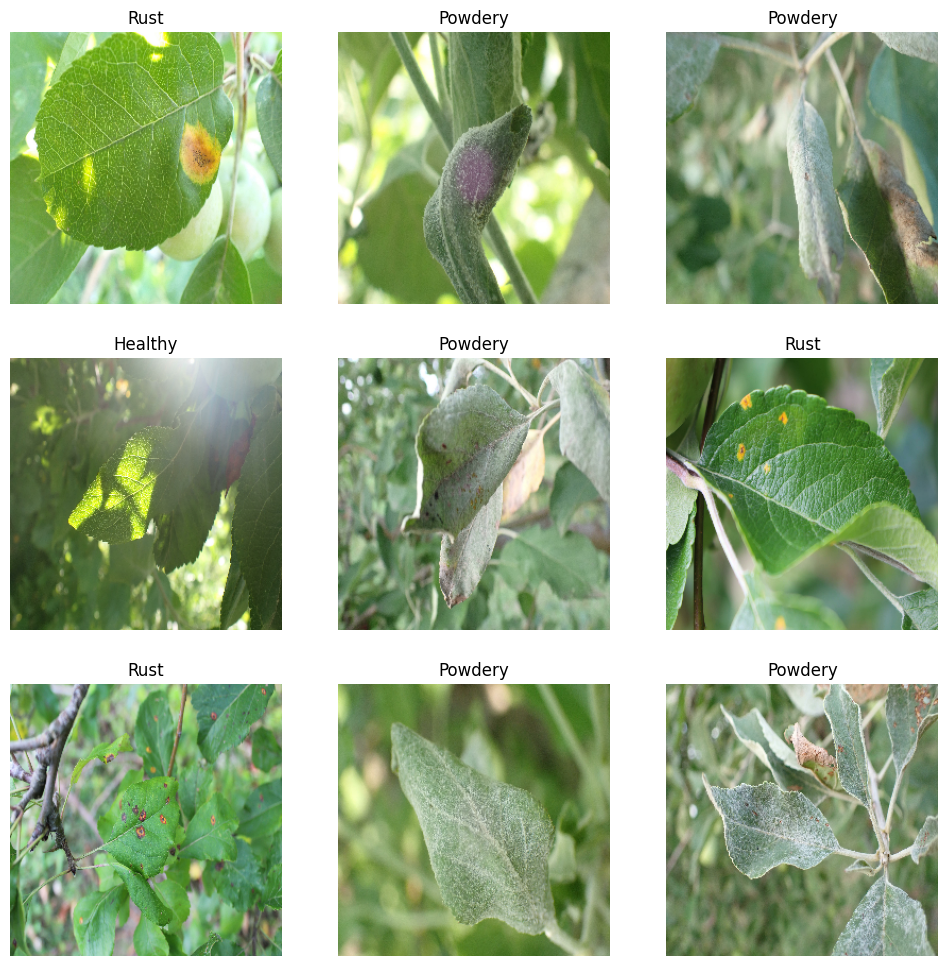

In [45]:
class_titles = train_data.class_names
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_titles[labels[i]])
        plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in val_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_titles[labels[i]])
        plt.axis('off')

In [ ]:
for image_batch, labels_batch in val_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_titles[labels[i]])
        plt.axis('off')

In [ ]:
for image_batch, labels_batch in test_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


### 4- Normalizing Images

In [ ]:
normalization_layer = tfl.Rescaling(1./255)
train_data_norm = train_data.map(lambda x, y:(normalization_layer(x), y))
val_data_norm = val_data.map(lambda x, y:(normalization_layer(x), y))
test_data_norm = test_data.map(lambda x, y:(normalization_layer(x), y))

### 5- Configuring the Dataset for performance

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data_norm = train_data_norm.prefetch(buffer_size= AUTOTUNE)# overlaps data preprocessing and model execution while training.

### 6- Building and compiling the Model

In [ ]:
def simple_model():
    input_shape=(256, 256, 3)
    classes=3
    X_input = tfl.Input(input_shape)
    X = tfl.RandomFlip('horizontal')(X_input)
    X = tfl.RandomRotation(0.2)(X)
    X = tfl.Conv2D(32, 3, strides=1, activation='relu')(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.MaxPooling2D(pool_size=(2, 2))(X)
    X = tfl.Conv2D(64, 3, strides=1, activation='relu')(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.MaxPooling2D(pool_size=(2, 2))(X)
    X = tfl.Conv2D(128, 3, strides=1, activation='relu')(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.MaxPool2D()(X)
    X = tfl.Flatten()(X)
    X = tfl.Dense(128, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tfl.Dense(64, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    X = tfl.Dense(32, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    X = tfl.Dense(3, activation='softmax')(X)

    return Model(inputs=X_input, outputs=X)

In [ ]:
model = simple_model()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              

 Total params: 14,850,307 (56.65 MB)

 Trainable params: 14,849,859 (56.65 MB)

 Non-trainable params: 448 (1.75 KB)

None


### 7- Model training

In [ ]:
history = model.fit(train_data_norm, validation_data=val_data_norm, epochs=30)

In [ ]:
history = model.fit(train_data_norm, validation_data=val_data_norm, epochs=30)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 517ms/step - accuracy: 0.5013 - loss: 6.9146 - val_accuracy: 0.4167 - val_loss: 9.0856
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accuracy: 0.6886 - loss: 3.0921 - val_accuracy: 0.5667 - val_loss: 5.5615
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 545ms/step - accuracy: 0.6646 - loss: 2.7239 - val_accuracy: 0.4667 - val_loss: 2.6273
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 532ms/step - accuracy: 0.6704 - loss: 2.1620 - val_accuracy: 0.4667 - val_loss: 2.7207
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 528ms/step - accuracy: 0.7069 - loss: 1.4170 - val_accuracy: 0.3500 - val_loss: 3.1352
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.7832 - loss: 0.7766 - val_accuracy: 0.3667 - val_loss: 4.3793
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 534ms/step - accuracy: 0.7769 - loss: 0.7759 - val_accuracy: 0.4333 - val_loss: 2.9719
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 570ms/step - accuracy: 0.8254 - loss: 0.6170 - val_accu

### 8- Visualizing performance

/tmp/ipykernel_24/2953203757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)
/tmp/ipykernel_24/2953203757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

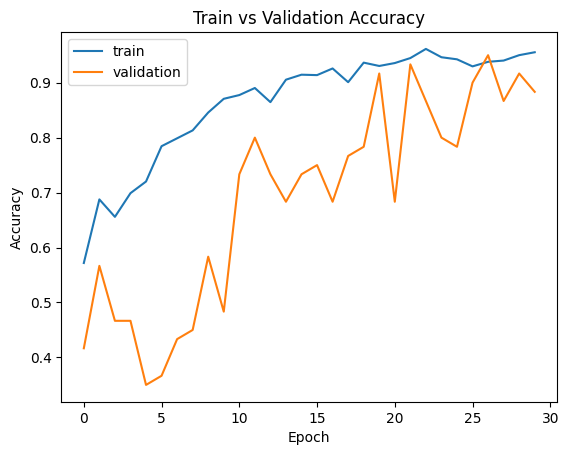

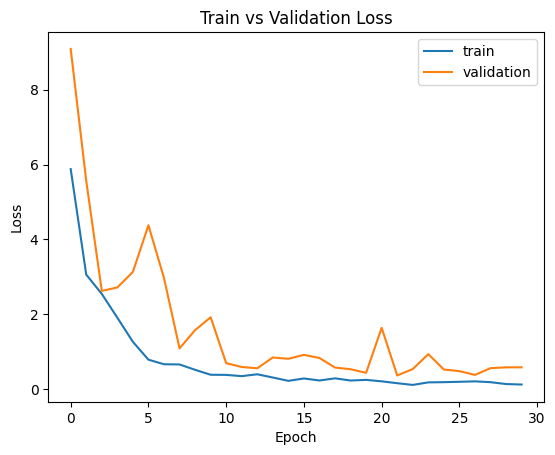

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)
df_acc = df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)
df_acc.plot(title="Train vs Validation Accuracy", ).set(xlabel='Epoch', ylabel='Accuracy')
df_loss.plot(title="Train vs Validation Loss", ).set(xlabel='Epoch', ylabel='Loss')

### lastly, Test Accuracy

In [ ]:
model.evaluate(test_data_norm)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.8906 - loss: 0.2808


[0.27215972542762756, 0.8866666555404663]